In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
schedule=pd.read_excel('Master_Scheduled_Days_Off.xlsx')

In [5]:
accident=pd.read_excel('Master_Accident_Data.xlsx')

In [6]:
accident.columns

Index(['accdate', 'Operator_ID', 'AccTypeCodeDescr', 'AccSubTypeCodeDescr',
       'acctype', 'BAITFISH Code', 'FileNumber', 'AccPreventable',
       'Retraining', 'RetrainingDate', 'vehbusno', 'vehmake', 'vehyear',
       'VehNoOccupants', 'Drv_Age', 'CoDrvSex', 'Roadway',
       'RoadwayLightConditions', 'RoadwayWeather', 'RoadwaySurface',
       'LocAddr1', 'Addr_Type', 'Neighborhood'],
      dtype='object')

In [7]:
accident.head()

,accdate,Operator_ID,AccTypeCodeDescr,AccSubTypeCodeDescr,acctype,BAITFISH Code,FileNumber,AccPreventable,Retraining,RetrainingDate,...,VehNoOccupants,Drv_Age,CoDrvSex,Roadway,RoadwayLightConditions,RoadwayWeather,RoadwaySurface,LocAddr1,Addr_Type,Neighborhood
0,2017-03-15 18:20:00,365,Vehicle Approaching From Angle,Vehicle approaches from right-both straight ac...,03 - MVA with Vehicle,0,17-249,Non-Preventable,N,NaT,...,1.0,47.0,F,Straight and Grade,Daylight,Snow,Snow,2194 N. CLINTON AVE,Address,West Irondequoit
1,2016-05-18 08:27:00,173,Vehicle Passing,Vehicle cuts in and scrapes RGRTA on left side,03 - MVA with Vehicle,0,16-617,Non-Preventable,N,NaT,...,0.0,40.0,M,Straight and Level,Daylight,Clear,Dry,4320 LAKE AVE.,Address,Charlotte
2,2018-09-12 14:09:00,329,Collisions with other motor vehicles,Miscellaneous,03 - MVA with Vehicle,0,18-1082,Non-Preventable,N,NaT,...,NaN,39.0,M,Straight and Level,Daylight,Cloudy,Dry,NaN,NaN,0
3,2019-05-07 15:00:00,276,Vehicle Approaching From Angle,Vehicle approaches from left-vehicle turns-RGR...,03 - MVA with Vehicle,0,19-598,Non-Preventable,N,NaT,...,NaN,41.0,M,Straight with Hillcrest,Daylight,Cloudy,Dry,NaN,NaN,0
4,2015-05-12 07:15:00,42,Passenger On Board Thrown By RGRTA Movement,Other part of equipment-passenger standing or ...,06 - On Board Injury/Incident,0,15-861,Non-Preventable,N,NaT,...,10.0,63.0,M,Straight and Level,Daylight,Clear,Dry,East Dr at Crittenden blvd,Intersection,Strong


## relationship between accident number and seniority date

In [12]:
absence=absence.merge(seniority_date, left_on='Operator_ID', right_on='Operator_ID', how='left')

In [21]:
combined_table=pd.DataFrame(absence.groupby('Operator_ID').accdate.agg('count')).reset_index().merge(seniority_date, left_on='Operator_ID',
                                                                                     right_on='Operator_ID', how='left')

In [25]:
combined_table=combined_table.dropna()

In [8]:
seniority_date=schedule.groupby('Operator_ID').Seniority_Date.first()


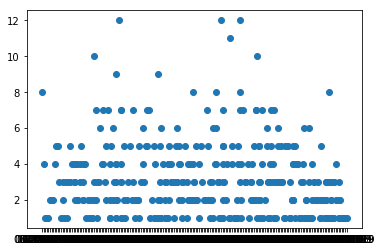

In [26]:
plt.scatter(combined_table.Seniority_Date, combined_table.accdate)
